In [1]:
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de Instituto BME.

# Para cada ejercicio: 1) Entregad un fichero en ipython notebook (.ipynb) ejecutable en Colab, y 
# 2) cada notebook ha de incluir un comentario sobre el ejercicio y sus resultados.


# 5) Usando los mejores parámetros (discount_factor, alpha, y epsilon) del ejercicio anterior. 
# Haz lo mismo que en el ejercicio anterior pero usando una red como función Q en lugar de una matriz. 
# Compara distintas configuraciones de red.

In [2]:
# tomo como referencia los ejemplos
# RL_Deep_Qlearning_Taxi_Keras_clase.ipynb
# RL_Deep_Qlearning_conv_Taxi_Keras_clase.ipynb
# poniendo los valores mejoes que me han salido en el ejercicio 4 de  
# learning_rate, gamma y eps

In [9]:
# 0. Cargo las librerias que he de cargar
# DE # RL_Deep_Qlearning_conv_Taxi_Keras_clase.ipynb
# Install pygame and virtual display (needed in Colab)
!pip install pygame
!pip install pyvirtualdisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!apt install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [11]:
from pyvirtualdisplay import Display
Display("xvfb").start()
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm.notebook import tqdm, trange
# To build and display animations
from PIL import Image
from IPython import display

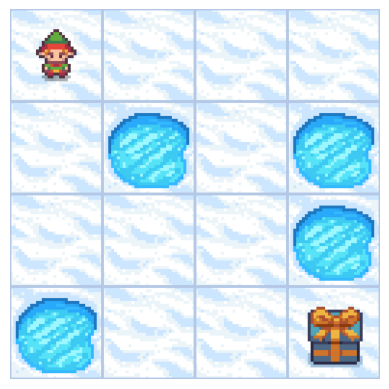

In [12]:
# 1 Cargo el entonro
# cargo env
# env = gym.make("Taxi-v3", render_mode="rgb_array", new_step_api=True)
env = gym.make("FrozenLake-v1", render_mode="rgb_array", new_step_api=True) # ansi
env.reset()
plt.imshow(env.render()[0])
plt.axis('off');

In [14]:
# 3 Defino tres configuraciones de modeles ya que en el enunciado dice que compare 
# varias configuraciones. He tomado las 3 que tenemos en los apuntes.
# Podria crear nuevas y más. Pero para este ejercicio, espero que sea suficiente
# con estas 3.

def modelo_1():
# tomo como referncia del model que nos dio 
# en RL_Deep_Qlearning_Taxi_Keras_clase.ipynb con Training loop_1
    import tensorflow as tf
    from keras import Model, Sequential
    from keras.layers import Dense, Lambda
    from keras.optimizers import Adam, SGD

    model = Sequential(name="q-learner")
    model.add(Dense(100, input_shape=(env.observation_space.n,), 
                    use_bias=False, activation='relu',
                    kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))
    model.add(Dense(20, use_bias=False, activation='relu',
                    kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))
    model.add(Dense(env.action_space.n, use_bias=False, 
                    activation=None,
                    kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))

    #model.add(Dense(env.action_space.n, input_shape=(env.observation_space.n,), 
    # use_bias=False, activation=None, 
    # kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))

    model.summary()
    return model

def modelo_2():
# tomo como referncia del model que nos dio 
# en RL_Deep_Qlearning_conv_Taxi_Keras_clase.ipynb con Training loop_2

    import tensorflow as tf
    from keras import Model, Sequential
    from keras.layers import Dense, Lambda, Conv2D, MaxPool2D, Flatten
    from keras.optimizers import Adam, SGD

    model = Sequential(name="q-learner")
    model.add(Conv2D(50,3, input_shape=(state.shape[1:]), 
                     use_bias=False, activation='relu'))
    model.add(MaxPool2D(3))
    model.add(Conv2D(20,3, use_bias=False, activation='relu'))
    model.add(MaxPool2D(3))
    model.add(Conv2D(40,3, use_bias=False, activation='relu'))
    model.add(MaxPool2D(3))
    model.add(Conv2D(40,3, use_bias=False, activation='relu'))
    model.add(MaxPool2D(3))
    model.add(Flatten())
    model.add(Dense(env.action_space.n, use_bias=False, 
                    activation=None,
                    kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))

    #model.add(Dense(env.action_space.n, input_shape=(env.observation_space.n,), use_bias=False, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))

    model.summary()
    return model


def modelo_3():
    # tomo como referncia del model que nos dio 
    # RL_Qlearning_Taxi_Keras_clase.ipynb con Training loop_1
    import tensorflow as tf
    from keras import Model, Sequential
    from keras.layers import Dense, Lambda
    from keras.optimizers import Adam, SGD

    model = Sequential(name="q-learner")
    model.add(Dense(env.action_space.n, input_shape=(env.observation_space.n,), 
                    use_bias=False, activation=None,
                    kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))
    model.summary()
    return model

In [15]:
# 4
# como existe una diferencia entre los dos Training loop que nos dio
# Valero de RL_Deep_Qlearning_Taxi_Keras_clase.ipynb y de 
# RL_Deep_Qlearning_conv_Taxi_Keras_clase.ipynb
# pues el primero es del sin conv y el segundo es con conv
# al primero lo llamo Training_loop_1 y al segundo pues Training_loop_2.

def Training_loop_1(env,model,learning_rate,gamma,epsilon,num_episodes):
    import tensorflow as tf
    # Identity matrix to encode all possible states
    idmat = tf.eye(env.observation_space.n)
    # Create list to contain total rewards
    rList = []
    rLoss = []
    states = []
    for episode in range(num_episodes):
        # Reset environment and get first new observation
        state = env.reset()
        rAll = 0
        # The Q-Network
        for _ in range(100):
            states.append(state)
            with tf.GradientTape() as tape:
                # Choose an action by greedily 
                 # (with epsilon chance of random action) from the Q-network
                Q = model(idmat[state:state+1])
                action = np.argmax(Q)
                if np.random.rand(1) < epsilon:
                    action = env.action_space.sample()
                # Get new state and reward from environment
                new_state, reward, terminated, truncated, info = env.step(action)
                # Obtain the Q' values by feeding the new state through our network
                Q1 = model(idmat[new_state:new_state+1])
                # Obtain maxQ' and set our target value for chosen action
                targetQ = Q.numpy()
                targetQ[0, action] = reward + gamma * np.max(Q1)
                loss = tf.reduce_sum(tf.square(targetQ - Q))

            grad = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grad, model.trainable_variables))
            # Direct gradient descent
            # w = model.get_weights()
            # w[0] += learning_rate * grad[0]
            # model.set_weights(w)

            rLoss.append(loss.numpy())
            state = new_state
            rAll += reward
            if terminated or truncated or (np.isnan(loss)):
                # Reduce chance of random action as we train the model
                epsilon = 1./((episode/50) + 10)
                break

        rList.append(rAll)
        if np.isnan(loss):
            break
        if (episode+1) % 20 == 0:
            print("Episode %4d, loss %.6f, rewards %.2f" %
                  (episode+1, loss.numpy(), sum(rList) / (episode+1)))
            print("Last reward:", rList[-1])

    print("Score over time:", sum(rList)/num_episodes)
    return rLoss,idmat, rList

def Training_loop_2(env,model,learning_rate,gamma,epsilon,num_episodes):
    import tensorflow as tf
    # Identity matrix to encode all possible states
    #idmat = tf.eye(env.observation_space.n)
    # Create list to contain total rewards
    rList = []
    rLoss = []
    #states = []
    for episode in range(num_episodes):
        # Reset environment and get first new observation
        env.reset()
        state = env.render()[0]/255
        state = np.expand_dims(state,0)
        rAll = 0
        # The Q-Network
        for _ in range(100):
        #    states.append(state)
            with tf.GradientTape() as tape:
                # Choose an action by greedily (with epsilon 
                # chance of random action) from the Q-network
                Q = model(state)
                action = np.argmax(Q)
                if np.random.rand(1) < epsilon:
                    action = env.action_space.sample()
                # Get new state and reward from environment
                new_state_aux, reward, terminated, truncated, info = env.step(action)
                new_state = env.render()[0]/255
                new_state = np.expand_dims(new_state,0)
                # Obtain the Q' values by feeding the new state through our network
                Q1 = model(new_state)
                # Obtain maxQ' and set our target value for chosen action
                targetQ = Q.numpy()
                targetQ[0, action] = reward + gamma * np.max(Q1)
                loss = tf.reduce_sum(tf.square(targetQ - Q))

            grad = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grad, model.trainable_variables))
            # Direct gradient descent
            # w = model.get_weights()
            # w[0] += learning_rate * grad[0]
            # model.set_weights(w)

            rLoss.append(loss.numpy())
            state = new_state
            rAll += reward
            if terminated or truncated:
                # Reduce chance of random action as we train the model
                epsilon = 1./((episode/50) + 10)

        rList.append(rAll)
        if np.isnan(loss):
            break
        if (episode+1) % 10 == 0:
            print("Episode %4d, loss %.6f, rewards %.2f" %
                  (episode+1, loss.numpy(), sum(rList) / (episode+1)))

    print("Score over time:", sum(rList)/num_episodes)
    return rLoss, rList

In [16]:
# 5 Pongo los parametros de inicializacion de Q  y entreno las redes
# HE PUESTO LOS PARAMETROS QUE ME SALEN MEJORES EN 
# learning_rate, gamma Y epsilon DEL EJE.4
# 0.90	0.97	0.12
# Set learning parameters


learning_rate = 0.90 
gamma = 0.97
epsilon = 0.12
num_episodes = 20000 # HE PUESTO MAS PQ LE CUESTA APRENDER

from keras.optimizers import Adam, SGD
optimizer = SGD(learning_rate=learning_rate)

Model: "q-learner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 20)                2000      
                                                                 
 dense_2 (Dense)             (None, 4)                 80        
                                                                 
Total params: 3,680
Trainable params: 3,680
Non-trainable params: 0
_________________________________________________________________
Episode   20, loss 0.000000, rewards 0.00
Last reward: 0.0
Episode   40, loss 0.000000, rewards 0.00
Last reward: 0.0
Episode   60, loss 0.000000, rewards 0.00
Last reward: 0.0
Episode   80, loss 0.000000, rewards 0.00
Last reward: 0.0
Episode  100, loss 0.000000, rewards 0.00
Last reward: 0.0
Episode  120, loss 0.000

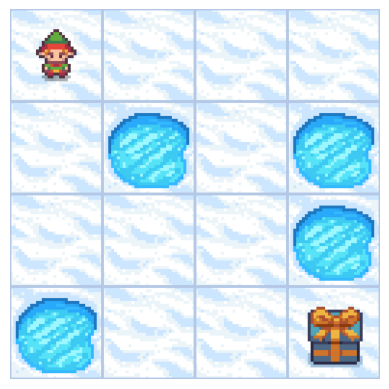

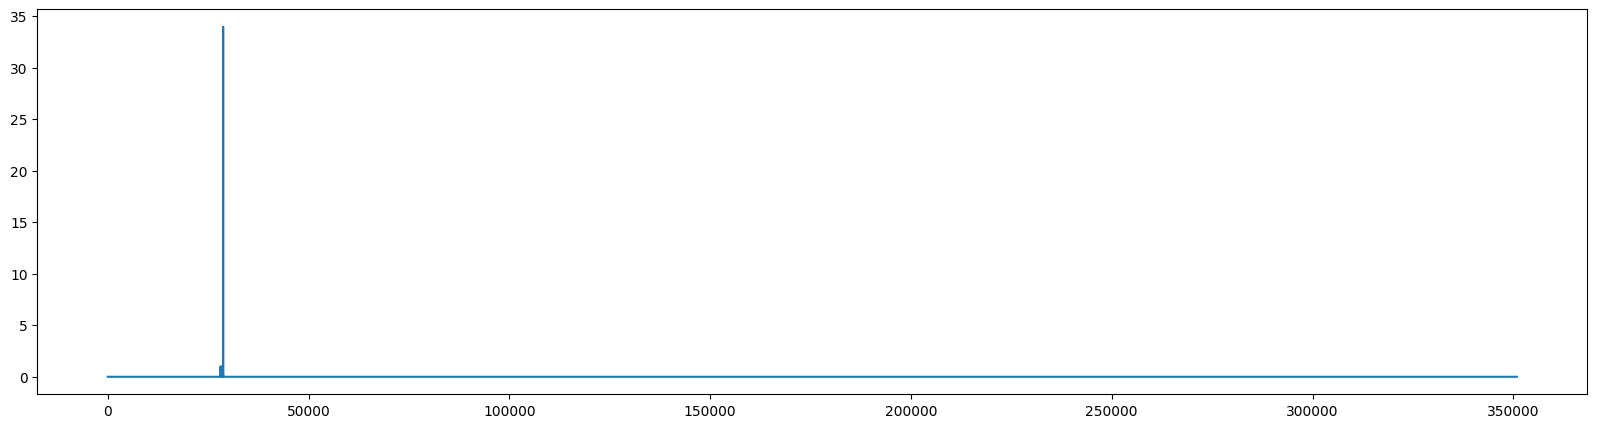

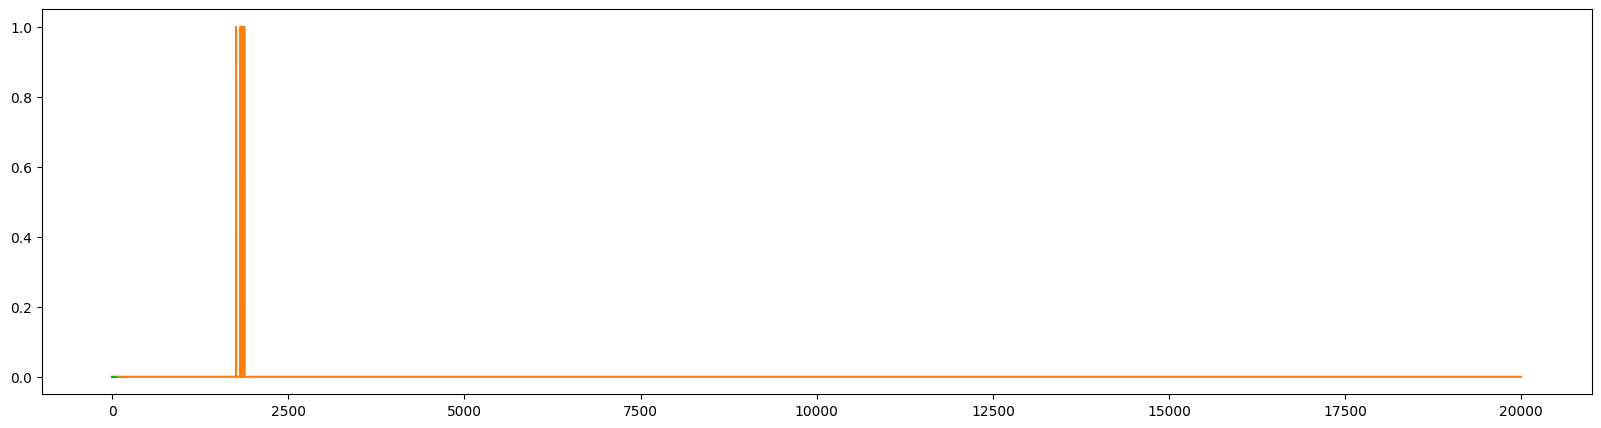

In [17]:
# 6 Entreno  y veo resultados de la primera red
env.reset()
plt.imshow(env.render()[0])
plt.axis('off');

model_1 = modelo_1()
rLoss,idmat, rList = Training_loop_1(env,model_1,learning_rate,gamma,epsilon,num_episodes)

# Changes in the loss
plt.figure(figsize=(20,5))
plt.plot(rLoss)
plt.figure(figsize=(20,5))
plt.plot(rLoss[-200:])

### The learned Q-Matrix, solo para Training loop_1
for n, s in enumerate(idmat):
    print(n, model_1(s[None, ...]).numpy())
    
### Evolution of the rewards as the network learns
# It can be seen that it earns more rewards as it learns
plt.plot(rList);
plt.plot(rList[-50:]);



Model: "q-learner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 50)      1350      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 84, 84, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 82, 82, 20)        9000      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 20)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 40)        7200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 40)         0 

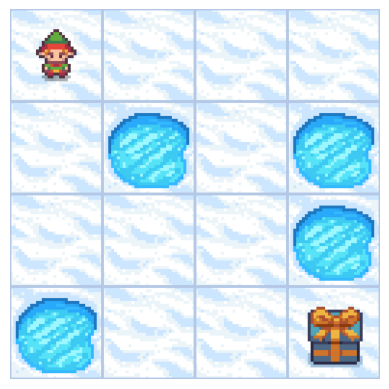

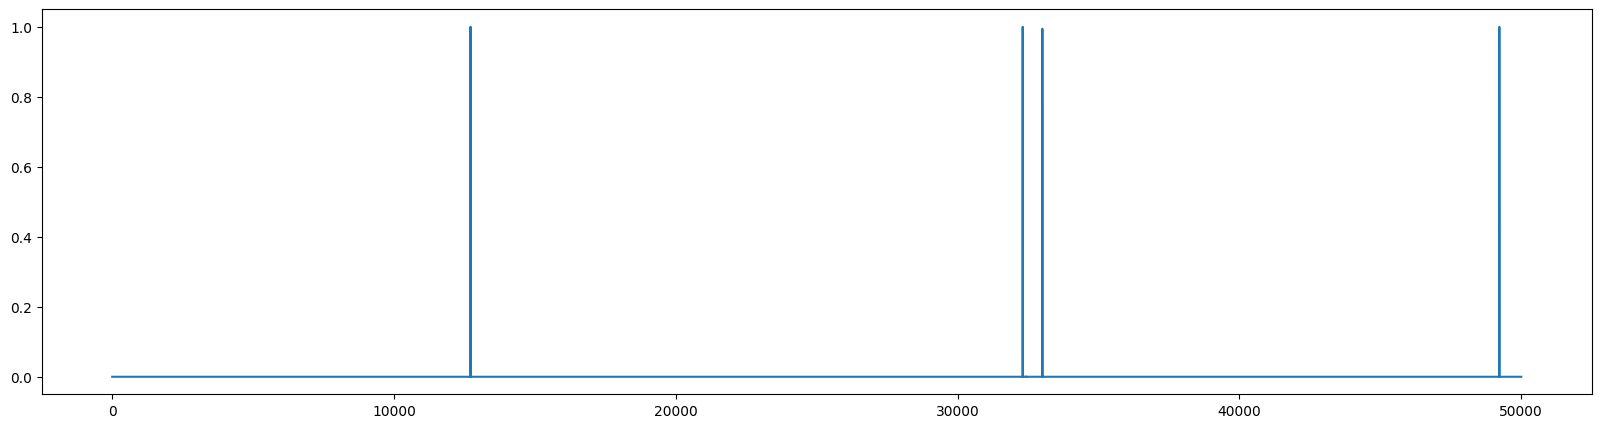

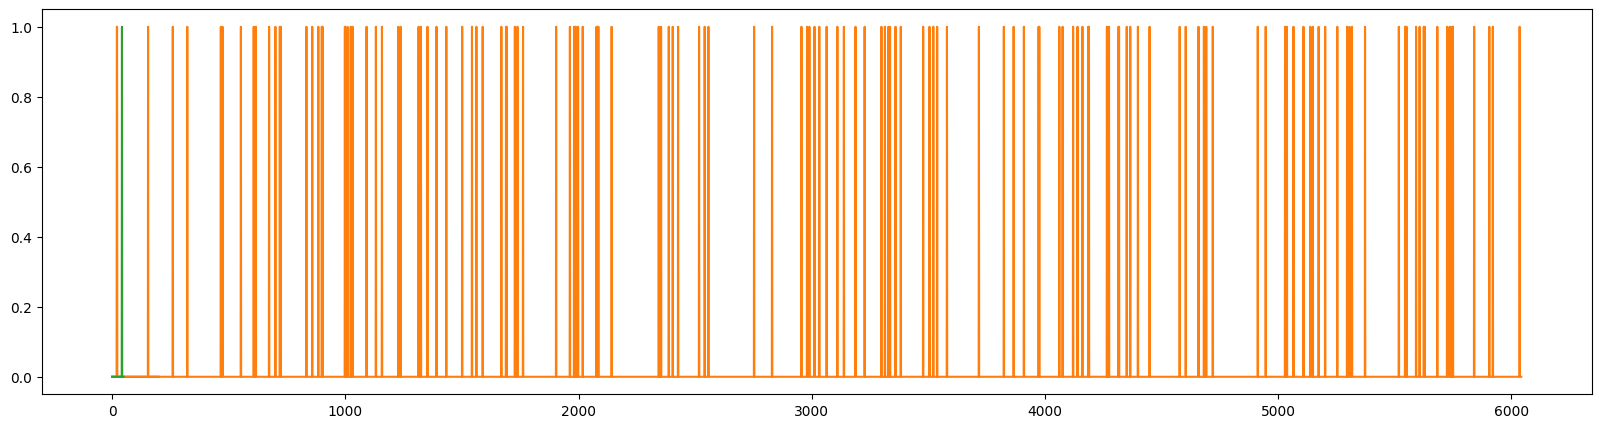

In [20]:
# 7 Entreno y veo resultados de la segunda red
env.reset()
state = env.render()[0]
plt.imshow(state)
plt.axis('off');


num_episodes = 500 # HE PUESTO 500 EN VEZ DE 2000 PQ VA MUY LENTO Y EL COLAB ME ECHA
# y CON 200 CASI NO HABIA ALCANZADO EL OBJETIVO NINGUNA VEZ Y POR LO TANTO
# LE RESULTA IMPOSIBLE APRENDER SI NO HA CONSEGUIDO NINGUN REFUERZO POR ALCANZAR 
# EL TESORO

state = np.expand_dims(state,0)
state.shape

model_2 = modelo_2()
rLoss,idmat = Training_loop_2(env,model_2,learning_rate,gamma,epsilon,num_episodes)
# Changes in the loss
plt.figure(figsize=(20,5))
plt.plot(rLoss)
plt.figure(figsize=(20,5))
plt.plot(rLoss[-200:])

### Evolution of the rewards as the network learns
# It can be seen that it earns more rewards as it learns
plt.plot(rList);
plt.plot(rList[-50:]);

Model: "q-learner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Episode   20, loss 0.000152, rewards 0.00
Last reward: 0.0
Episode   40, loss 0.002026, rewards 0.05
Last reward: 0.0
Episode   60, loss 0.066168, rewards 0.03
Last reward: 0.0
Episode   80, loss 0.033397, rewards 0.03
Last reward: 0.0
Episode  100, loss 329594240.000000, rewards 0.02
Last reward: 0.0
Episode  120, loss 0.003328, rewards 0.02
Last reward: 0.0
Episode  140, loss 0.009379, rewards 0.01
Last reward: 0.0
Episode  160, loss 0.000002, rewards 0.02
Last reward: 0.0
Episode  180, loss 734743.937500, rewards 0.02
Last reward: 0.0
Episode  200, loss 188508.031250, rewards 0.0

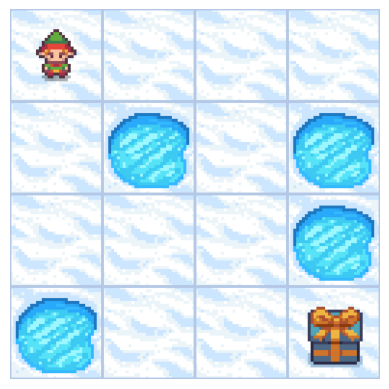

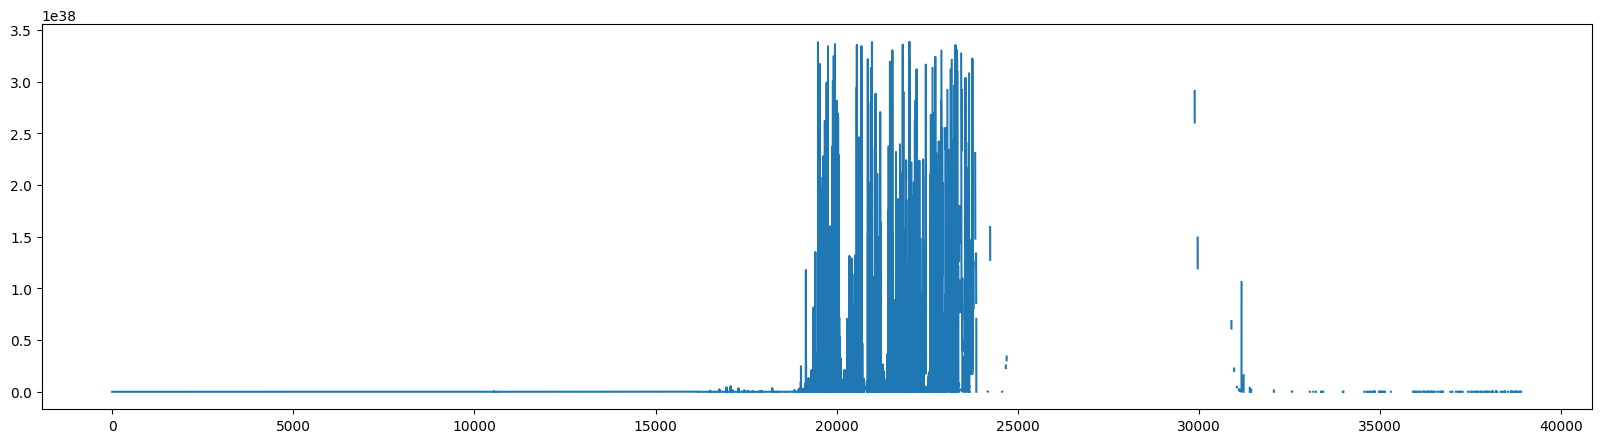

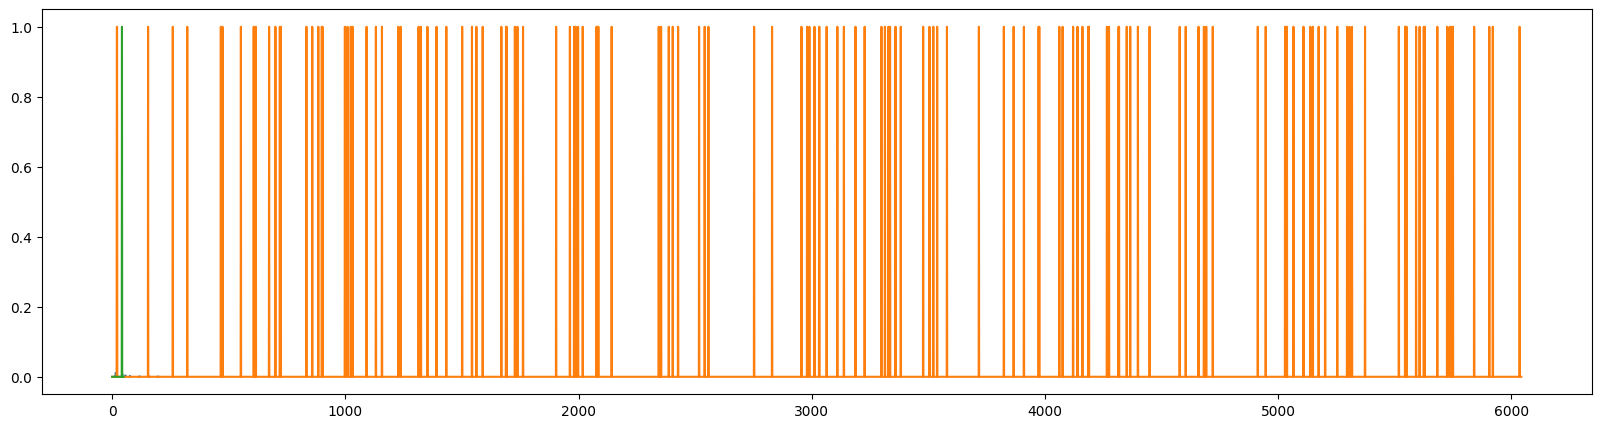

In [19]:
# 8 Entreno y veo resultados de la tercera red
env.reset()
plt.imshow(env.render()[0])
plt.axis('off');

num_episodes = 20000 # HE PUESTO  * 10 EL NUMERO DE EPISOCIOS DEL CASO 2 PQ
# EL CASO 2 NECESITA MUCHISIMO MAS TIEMPO QUE ESTE; Y ES PARA POR LO 
# MENOS COMPARAR EN TIEMPO DE ENTRENAMIENTO

model_3 = modelo_3()
rLoss,idmat, rList = Training_loop_1(env,model_3,
                                     learning_rate,gamma,epsilon,num_episodes)

# Changes in the loss
plt.figure(figsize=(20,5))
plt.plot(rLoss)
plt.figure(figsize=(20,5))
plt.plot(rLoss[-200:])

### The learned Q-Matrix, solo para Training loop_1
for n, s in enumerate(idmat):
    print(n, model_3(s[None, ...]).numpy())
    
### Evolution of the rewards as the network learns
# It can be seen that it earns more rewards as it learns
plt.plot(rList);
plt.plot(rList[-50:]);

In [ ]:
# 9 Compara distintas configuraciones de red.
# model_1 en 20000 interaciones no ha aprendido a llegar casi ni una vez al tesoro.
# No a aprendido nada con esta matriz de pesos en cada posicion del entorno:
# 0 [[0. 0. 0. 0.]]
# 1 [[0. 0. 0. 0.]]
# 2 [[0. 0. 0. 0.]]
# 3 [[0. 0. 0. 0.]]
# 4 [[0. 0. 0. 0.]]
# 5 [[0. 0. 0. 0.]]
# 6 [[0. 0. 0. 0.]]
# 7 [[0. 0. 0. 0.]]
# 8 [[0. 0. 0. 0.]]
# 9 [[0. 0. 0. 0.]]
# 10 [[0. 0. 0. 0.]]
# 11 [[0. 0. 0. 0.]]
# 12 [[0. 0. 0. 0.]]
# 13 [[0. 0. 0. 0.]]
# 14 [[0. 0. 0. 0.]]
# 15 [[0. 0. 0. 0.]]

# model_2 en 500 interaciones va muchisimo mas lento pero aprende y tiene recompensar 
# en episodios tempranos mucho más rápidamente en episodios que el modelo 1
# (que no alcanza a tener ninguna recompensa).
# Para este modelo y su forma de entrenamiento, no se calcula ni saca el idmat.
# Por lo tanto no saco la matriz de pesos en cada posicion del entorno:
# Parece que aprende algo ya que tiene rewards cada vez mas consitentes en el tiempo.


# modelo 3 en 20000 interaciones es lo mas sencillo que un modelo puede ser. Sera el mas rapido.
# Da unas loos muy muy altas. Si llega al tesoro con gran facilidad 
# Y por lo tanto consigue recompensas y puede aprender. 
# Pero le cuesta aprender. Creo que es pq la red ha de ser un poco mas compleja.
# A aprendido como se ve en la matriz de pesos en cada posicion del entorno:
# 0 [[-5.3259093e+37 -1.4642630e+38 -3.7514446e+37            nan]]
# 1 [[-1.9145603e+37 -3.0179756e+37 -1.3045352e+38            nan]]
# 2 [[-2.2331422e+37 -2.3602577e+37 -5.1832433e+37            nan]]
# 3 [[-2.8224678e+28 -2.3686175e+36  1.4820052e-02            nan]]
# 4 [[-2.0204348e+37  1.2316510e+37 -5.3990953e+37            nan]]
# 5 [[0.00382745 0.00888899 0.00354397        nan]]
# 6 [[-6.1565594e+36  1.4982683e+36 -4.9900909e+37            nan]]
# 7 [[0.00811572 0.00890255 0.00847358        nan]]
# 8 [[-1.6044698e+37 -1.0590875e+36 -7.5660265e+36            nan]]
# 9 [[-2.2676621e+36 -4.2941645e+36  1.1441903e+36            nan]]
# 10 [[-2.8427439e+36 -3.4216083e+36 -1.2700577e+36            nan]]
# 11 [[0.00245436 0.00655037 0.00374722        nan]]
# 12 [[0.0098729  0.00735913 0.00751569        nan]]
# 13 [[-2.5190713e+35 -3.9819096e+35 -9.1979816e+34            nan]]
# 14 [[-6.3456961e+35 -2.2968973e+35 -1.1005385e+36            nan]]
# 15 [[0.00196944 0.00984841 0.00568302        nan]]
# Los nan es consecuencia d eun loss tan alto y viceversa. Creo que lo mejor sera
# escoger uan matriz de pesos en cada poscion del entorno con menor loss, 
# grabando la que tenga menos loss en las iteraciones.



In [ ]:
# extra por si lo necesito para visualizar para con training_1
# por si acaso
# Play
state = env.reset()
total_reward = 0
for n in range(100):
    # The model suggests the next action
    action = np.argmax(model(idmat[state:state+1]))
    # Get new state and reward from environment
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

imgs = env.render()
print("Steps", n, "total reward", total_reward)

In [ ]:
# por si acaso
frames = [Image.fromarray(im) for im in imgs]
animation = frames[0]
animation.save("animation.gif", format="GIF", append_images=frames, save_all=True, duration=len(frames)*5)
display.Image('animation.gif')